In [1]:
pip install numpy opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def upload_images():
    # Manually specify the paths to your images
    original_image_path = r"C:\Users\user\Downloads\a5000-kme_0204.tif"
    filtered_image_path = r"C:\Users\user\Downloads\a5000-kme_0204_mode_r19.png"

    return original_image_path, filtered_image_path

In [35]:
def calculate_psnr(original, compressed):
    # Compute Mean Squared Error (MSE)
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')  # Images are identical
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr, mse

In [6]:
def load_images(original_image_path, filtered_image_path):
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    filtered_image = cv2.imread(filtered_image_path, cv2.IMREAD_GRAYSCALE)

    # Ensure that both images are loaded correctly
    if original_image is None or filtered_image is None:
        print("Error loading one of the images!")
        return None, None
    return original_image, filtered_image

In [7]:
def visualize_images(original_image, filtered_image):
    # Visualize the images side by side for comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(filtered_image, cmap='gray')
    axes[1].set_title("Filtered Image")
    axes[1].axis('off')

    plt.show()

In [8]:
def visualize_difference(original_image, filtered_image):
    # Visualize the difference image
    difference_image = cv2.absdiff(original_image, filtered_image)
    plt.imshow(difference_image, cmap='gray')
    plt.title("Difference Image (Median vs Mode)")
    plt.axis('off')
    plt.show()

PSNR value: 30.464003527605932 dB
MSE value: 58.43593645019736


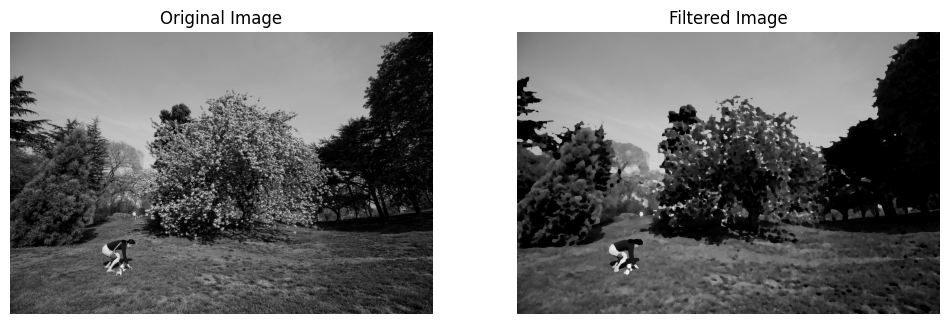

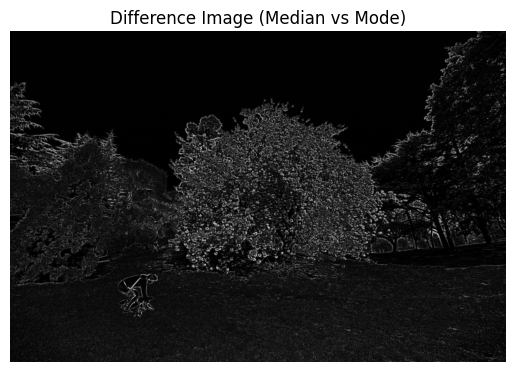

In [78]:
def main():
    # Step 1: Upload images (with file dialog)
    original_image_path, filtered_image_path = upload_images()
    if original_image_path is None or filtered_image_path is None:
        return

    # Step 2: Load the images
    original_image, filtered_image = load_images(original_image_path, filtered_image_path)
    if original_image is None or filtered_image is None:
        return

    # Step 3: Calculate PSNR between the original and filtered image
    psnr_value, mse_value = calculate_psnr(original_image, filtered_image)
    print(f"PSNR value: {psnr_value} dB")
    print(f"MSE value: {mse_value}")

    # Step 4: Visualize the images
    visualize_images(original_image, filtered_image)

    # Step 5: Visualize the difference image
    visualize_difference(original_image, filtered_image)

# Run the main function
main()